### Convolutional Neural Network - Keras

> **CIFAR10 dataset** - The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

### Imports

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [7]:
cifar10 = datasets.cifar10.load_data()

In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10

In [24]:
train_images[0].shape

(32, 32, 3)

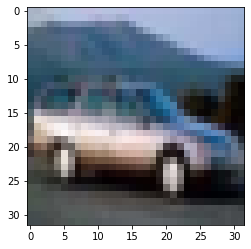

In [28]:
### Visualising the first image
plt.imshow(train_images[4], cmap=plt.cm.binary)

### Scaling images

> We want to scale down the image pixcels so that they will be normalised and be a number bewtween `0`  and `1`

In [37]:
train_images, test_images = train_images/255.0, test_images/255.0

In [38]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

### Creating a CNN
> As input, a CNN takes tensors of shape **(image_height, image_width, color_channels)**, ignoring the batch size.

In [49]:
input_shape = train_images[0].shape
input_shape

(32, 32, 3)

In [50]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

### Combile the model

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Fitting the model

In [52]:
EPOCHS =  3
BATCH_SIZE = 8
VALIDATION_DATA = (test_images, test_labels)
history = model.fit(train_images, train_labels, epochs=EPOCHS, 
                    validation_data=VALIDATION_DATA,
                    batch_size=BATCH_SIZE
                   )

Epoch 1/3
6250/6250 [==============================] - 120s 17ms/step - loss: 2.3030 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/3
2413/6250 [==========>...................] - ETA: 54s - loss: 2.3030 - accuracy: 0.096

KeyboardInterrupt: 

> **THIS IS VERY SLOW ON A CPU**- so we may want to use the cpu to perform this task.